Before running this example please run `run_simulations.py` script to generate data.

In [1]:
import glob
from itertools import product

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
matplotlib.rcParams.update({'font.size': 16})

In [3]:
def generate_plot(data):
    plt.figure(figsize = (5, 4), dpi=1000)

    sns.scatterplot(data = data, x = 'h', y = 'result', hue = 'p',
                    palette=sns.color_palette(['blue', 'green', 'red']))

    plt.ylabel('$\\bar{c}_{\\tau}$')
    plt.ylim(0, 1.05)
    plt.legend(loc = 'lower right')
    plt.tight_layout()

In [4]:
GRAPHS = ['lattice', 'complete', 'watts-strogatz', 'barabasi-albert']

P = [0.05, 0.1, 0.2]
F = [0.1]
Q = [4]
H = np.arange(0.04, 0.23, 0.01)

In [5]:
results = []

for graph, p, f, q, h in product(GRAPHS, P, F, Q, H):
    current_graph_path = f"{graph}/p-{p}/f-{f}/q-{q}/h-{h}"
    print(current_graph_path)
    current_graph_simulation = [(pd.read_csv(el).iloc[-1] == 1).mean() for el in glob.glob(f'results/simulations/{current_graph_path}/*.csv')]
    current_graph_simulation = np.mean(current_graph_simulation)
    res = {
        "graph": graph,
        "p": p,
        "f": f,
        "q": q,
        "h": h,
        "result": current_graph_simulation
    }
    results.append(res)

lattice/p-0.05/f-0.1/q-4/h-0.04
lattice/p-0.05/f-0.1/q-4/h-0.05
lattice/p-0.05/f-0.1/q-4/h-0.060000000000000005
lattice/p-0.05/f-0.1/q-4/h-0.07
lattice/p-0.05/f-0.1/q-4/h-0.08000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.09000000000000001
lattice/p-0.05/f-0.1/q-4/h-0.1
lattice/p-0.05/f-0.1/q-4/h-0.11000000000000001
lattice/p-0.05/f-0.1/q-4/h-0.12000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.13000000000000003
lattice/p-0.05/f-0.1/q-4/h-0.14
lattice/p-0.05/f-0.1/q-4/h-0.15000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.16000000000000003
lattice/p-0.05/f-0.1/q-4/h-0.17000000000000004
lattice/p-0.05/f-0.1/q-4/h-0.18000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.19000000000000003
lattice/p-0.05/f-0.1/q-4/h-0.20000000000000004
lattice/p-0.05/f-0.1/q-4/h-0.21000000000000005
lattice/p-0.05/f-0.1/q-4/h-0.22000000000000006
lattice/p-0.1/f-0.1/q-4/h-0.04
lattice/p-0.1/f-0.1/q-4/h-0.05
lattice/p-0.1/f-0.1/q-4/h-0.060000000000000005
lattice/p-0.1/f-0.1/q-4/h-0.07
lattice/p-0.1/f-0.1/q-4/h-0.08000000000000

barabasi-albert/p-0.05/f-0.1/q-4/h-0.14
barabasi-albert/p-0.05/f-0.1/q-4/h-0.15000000000000002
barabasi-albert/p-0.05/f-0.1/q-4/h-0.16000000000000003
barabasi-albert/p-0.05/f-0.1/q-4/h-0.17000000000000004
barabasi-albert/p-0.05/f-0.1/q-4/h-0.18000000000000002
barabasi-albert/p-0.05/f-0.1/q-4/h-0.19000000000000003
barabasi-albert/p-0.05/f-0.1/q-4/h-0.20000000000000004
barabasi-albert/p-0.05/f-0.1/q-4/h-0.21000000000000005
barabasi-albert/p-0.05/f-0.1/q-4/h-0.22000000000000006
barabasi-albert/p-0.1/f-0.1/q-4/h-0.04
barabasi-albert/p-0.1/f-0.1/q-4/h-0.05
barabasi-albert/p-0.1/f-0.1/q-4/h-0.060000000000000005
barabasi-albert/p-0.1/f-0.1/q-4/h-0.07
barabasi-albert/p-0.1/f-0.1/q-4/h-0.08000000000000002
barabasi-albert/p-0.1/f-0.1/q-4/h-0.09000000000000001
barabasi-albert/p-0.1/f-0.1/q-4/h-0.1
barabasi-albert/p-0.1/f-0.1/q-4/h-0.11000000000000001
barabasi-albert/p-0.1/f-0.1/q-4/h-0.12000000000000002
barabasi-albert/p-0.1/f-0.1/q-4/h-0.13000000000000003
barabasi-albert/p-0.1/f-0.1/q-4/h-0.14
b

In [6]:
df = pd.DataFrame(results)

In [7]:
df['p'] = df['p'].astype(str)

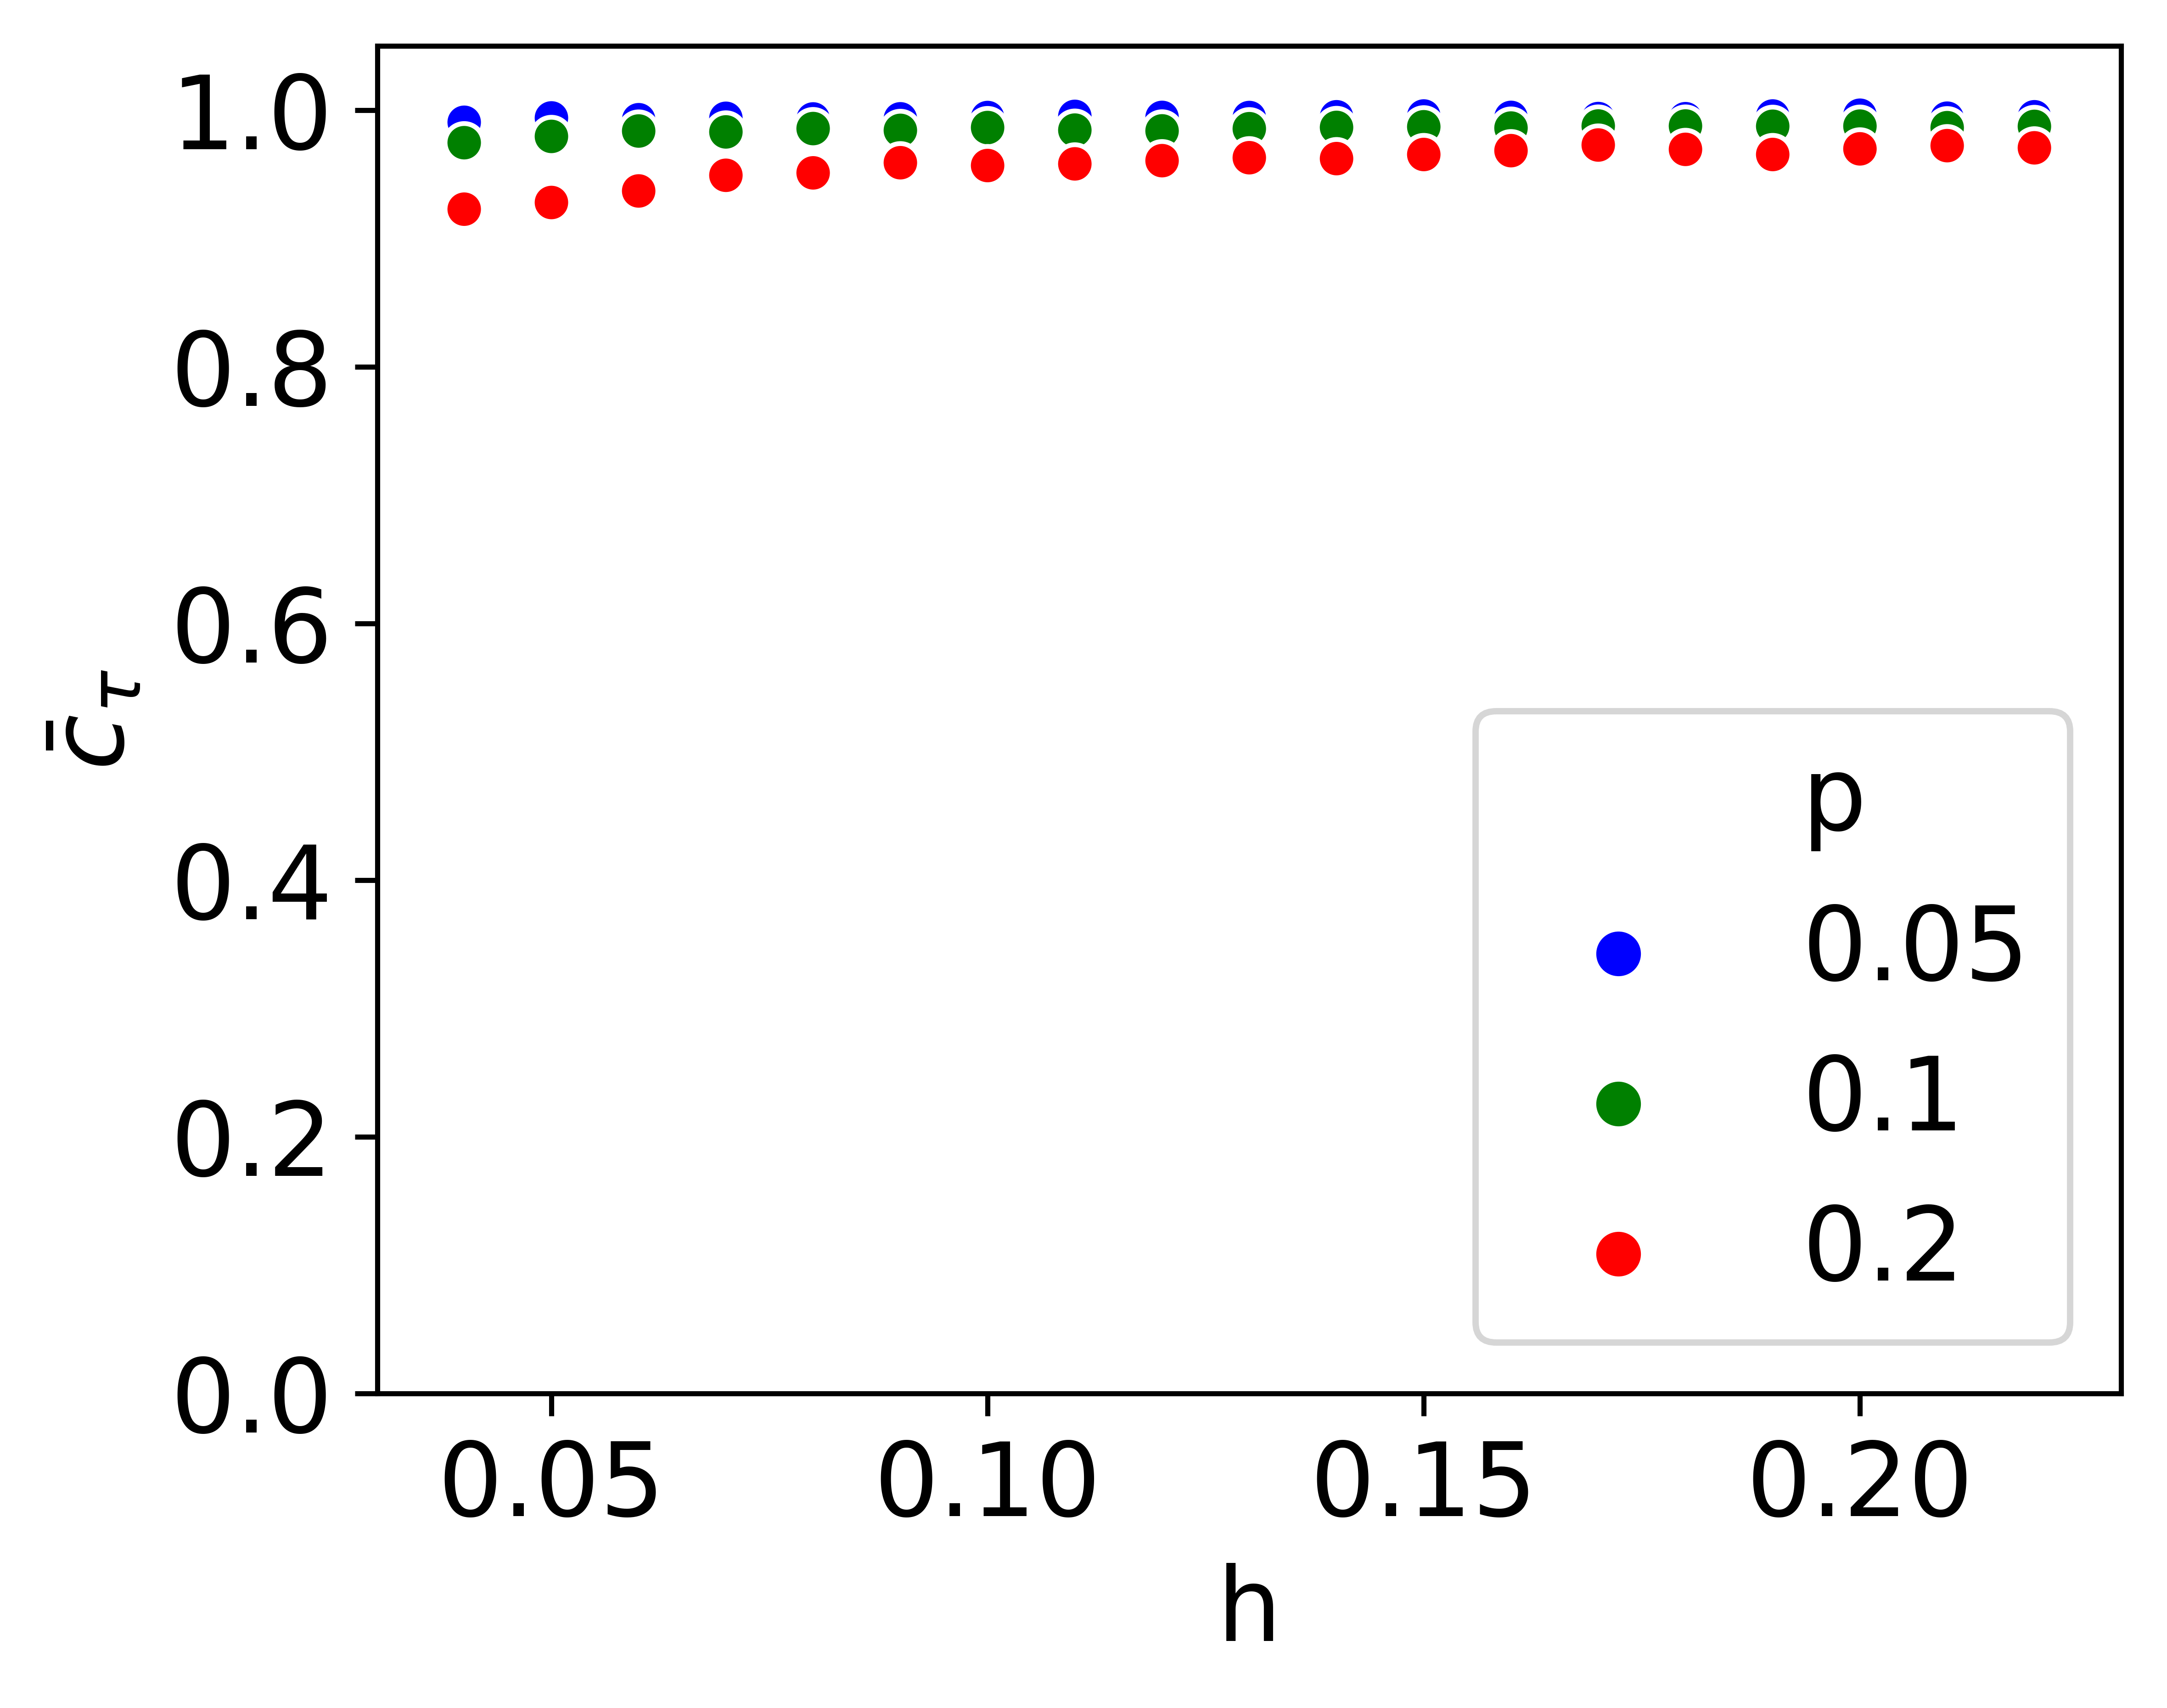

In [8]:
generate_plot(df[df['graph'] == 'lattice'])
plt.savefig('results/images/hp-lattice.png')

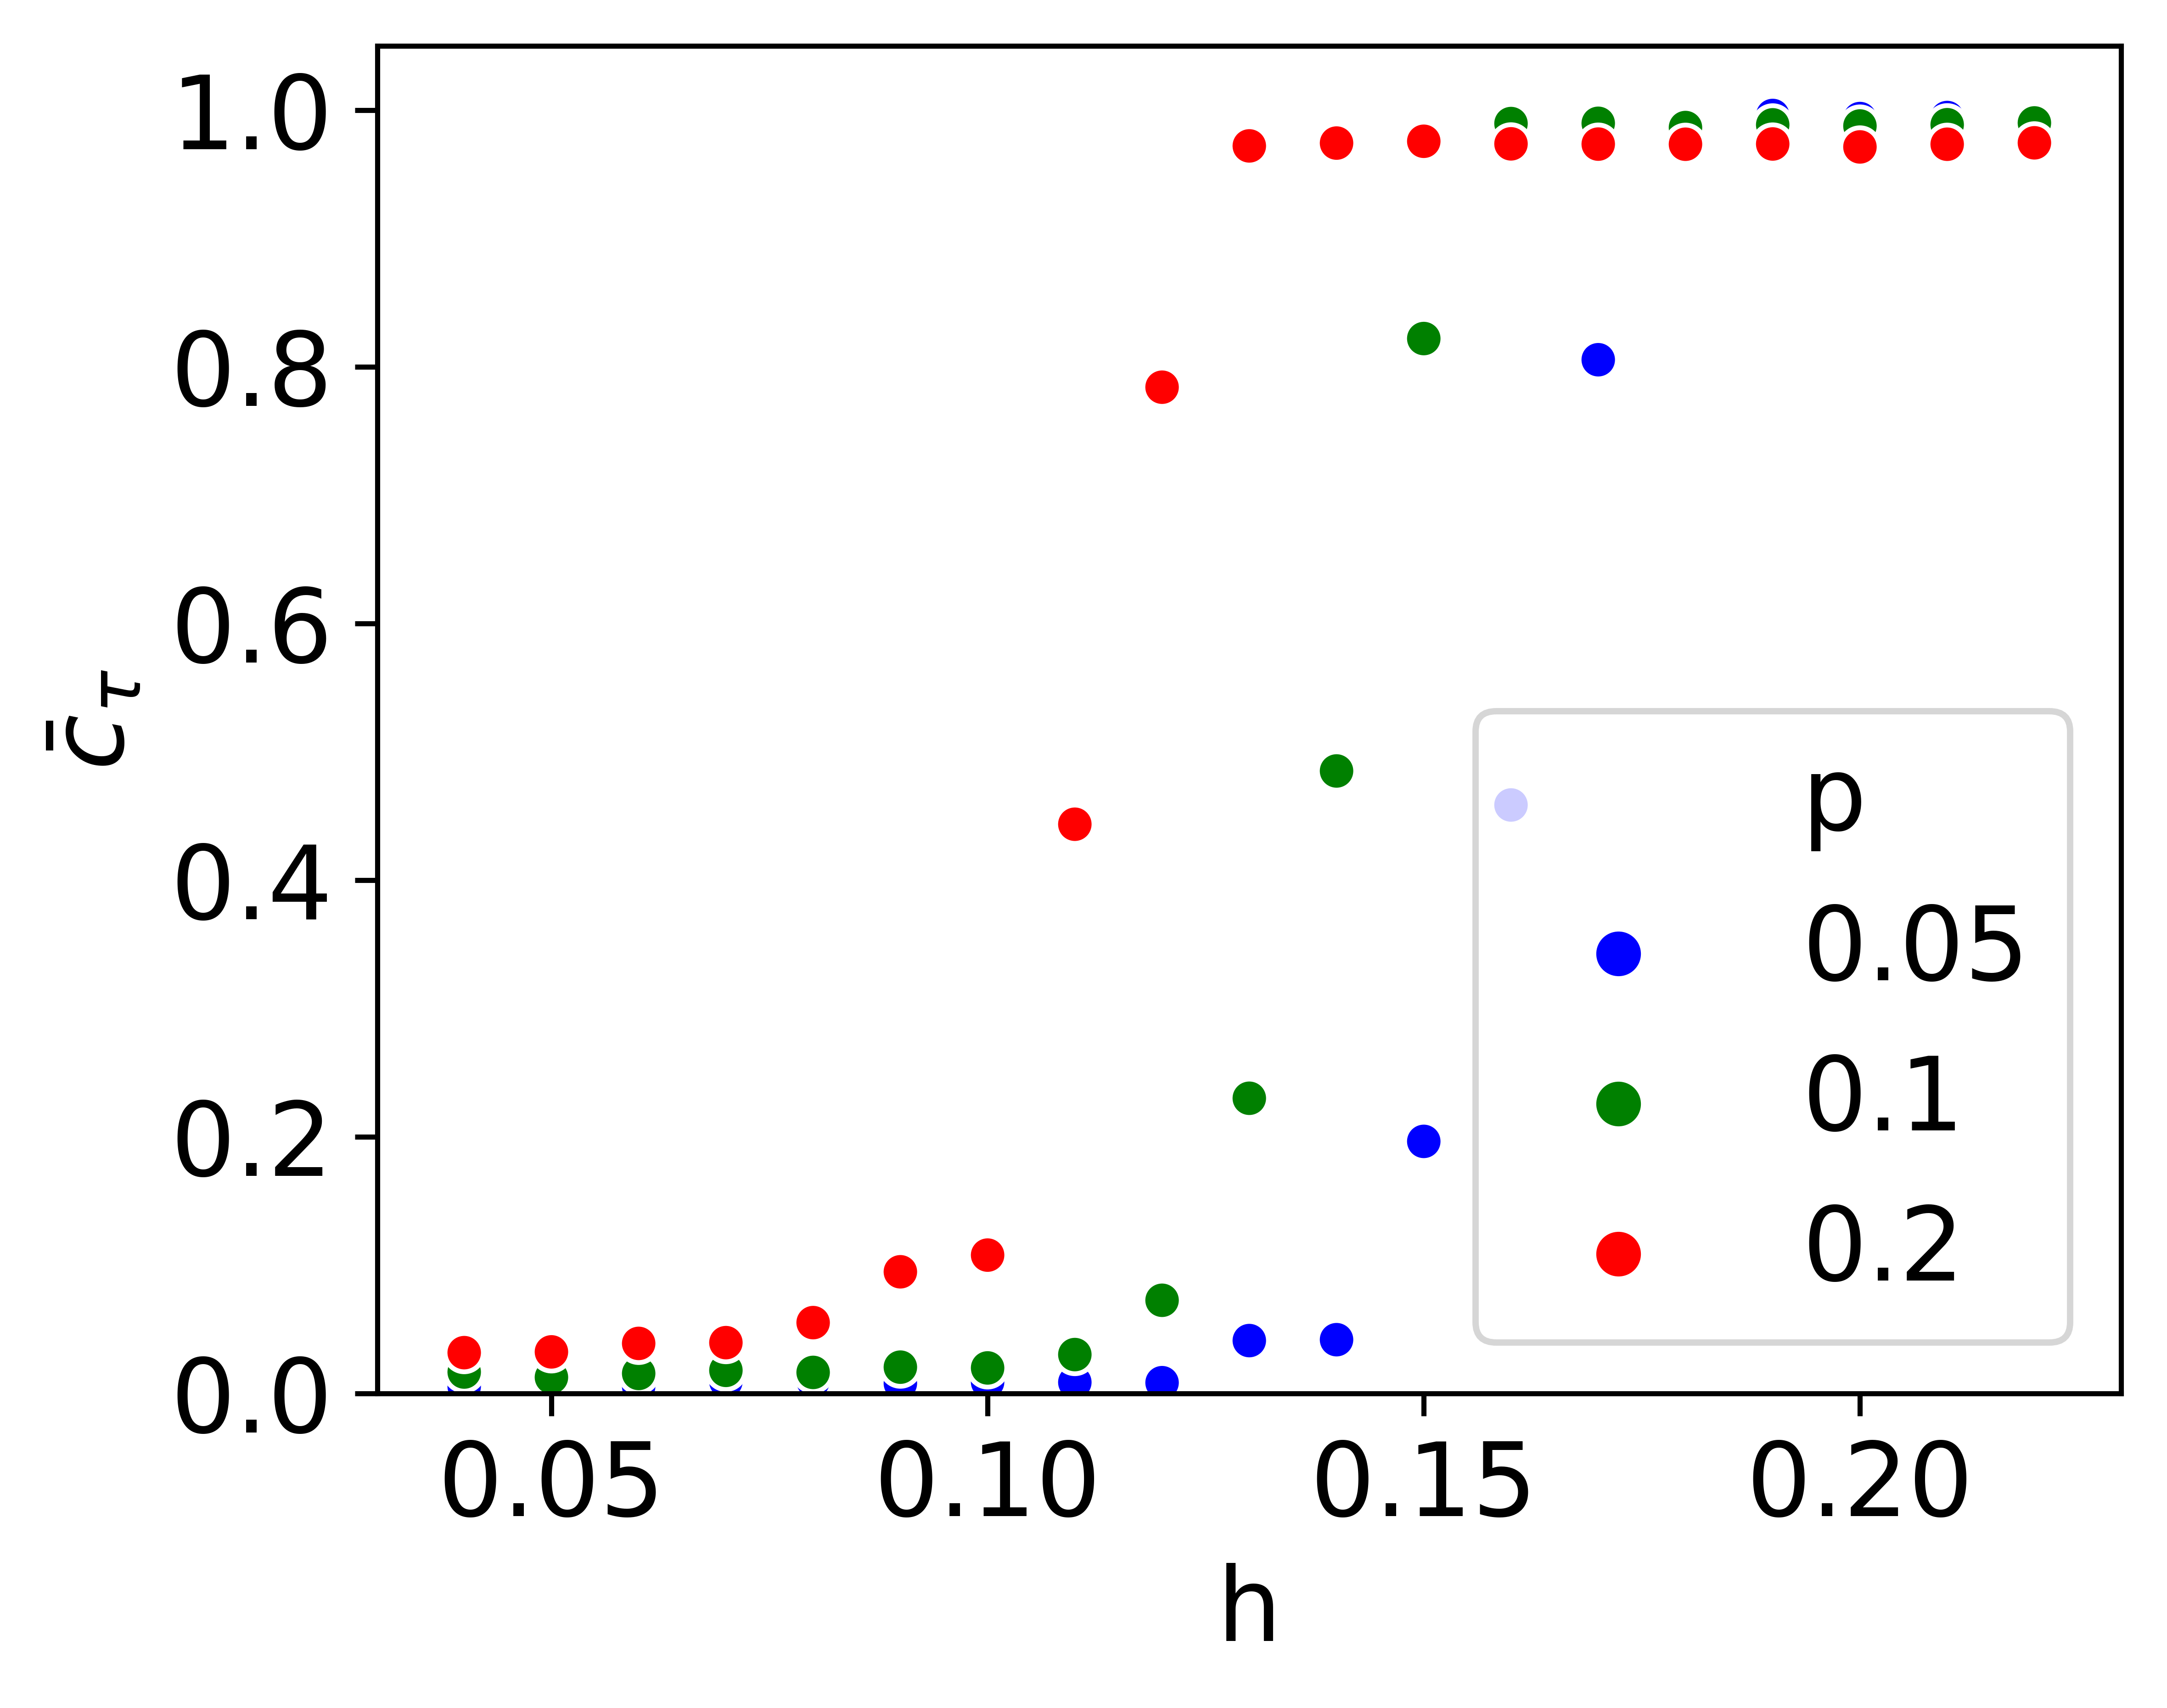

In [9]:
generate_plot(df[df['graph'] == 'complete'])
plt.savefig('results/images/hp-complete.png')

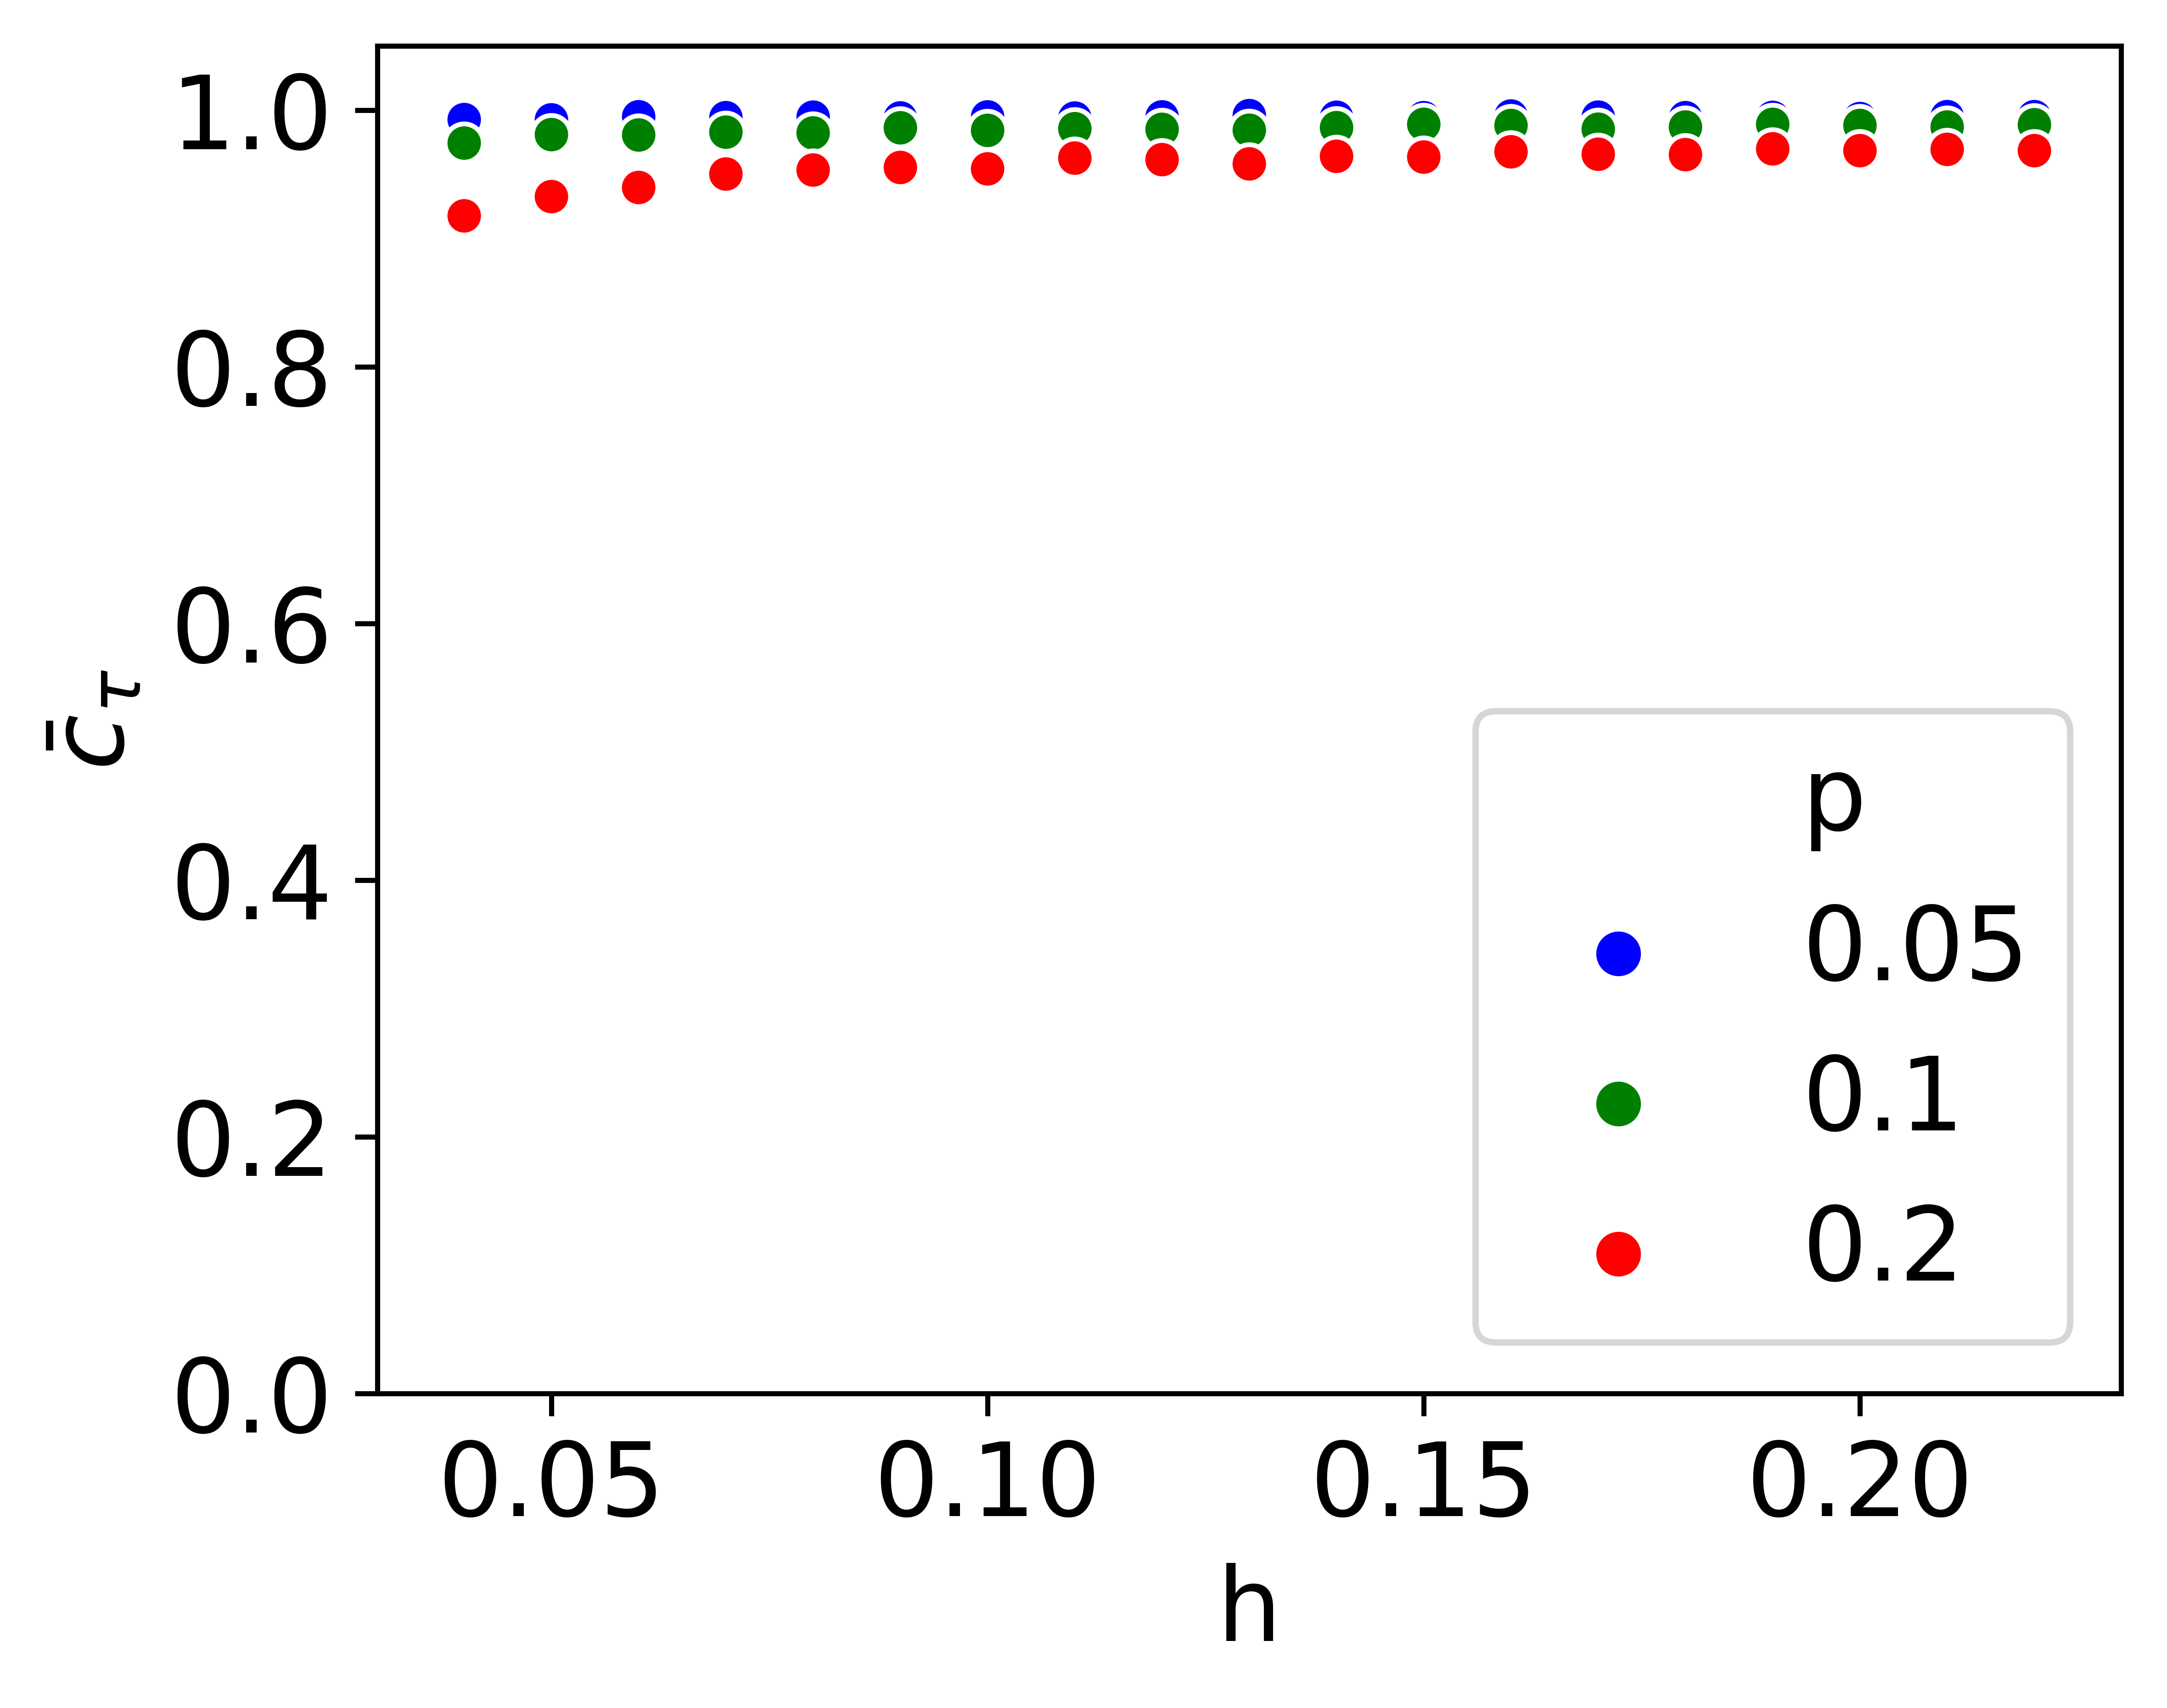

In [11]:
generate_plot(df[df['graph'] == 'watts-strogatz'])
plt.savefig('results/images/hp-watts-strogatz.png')

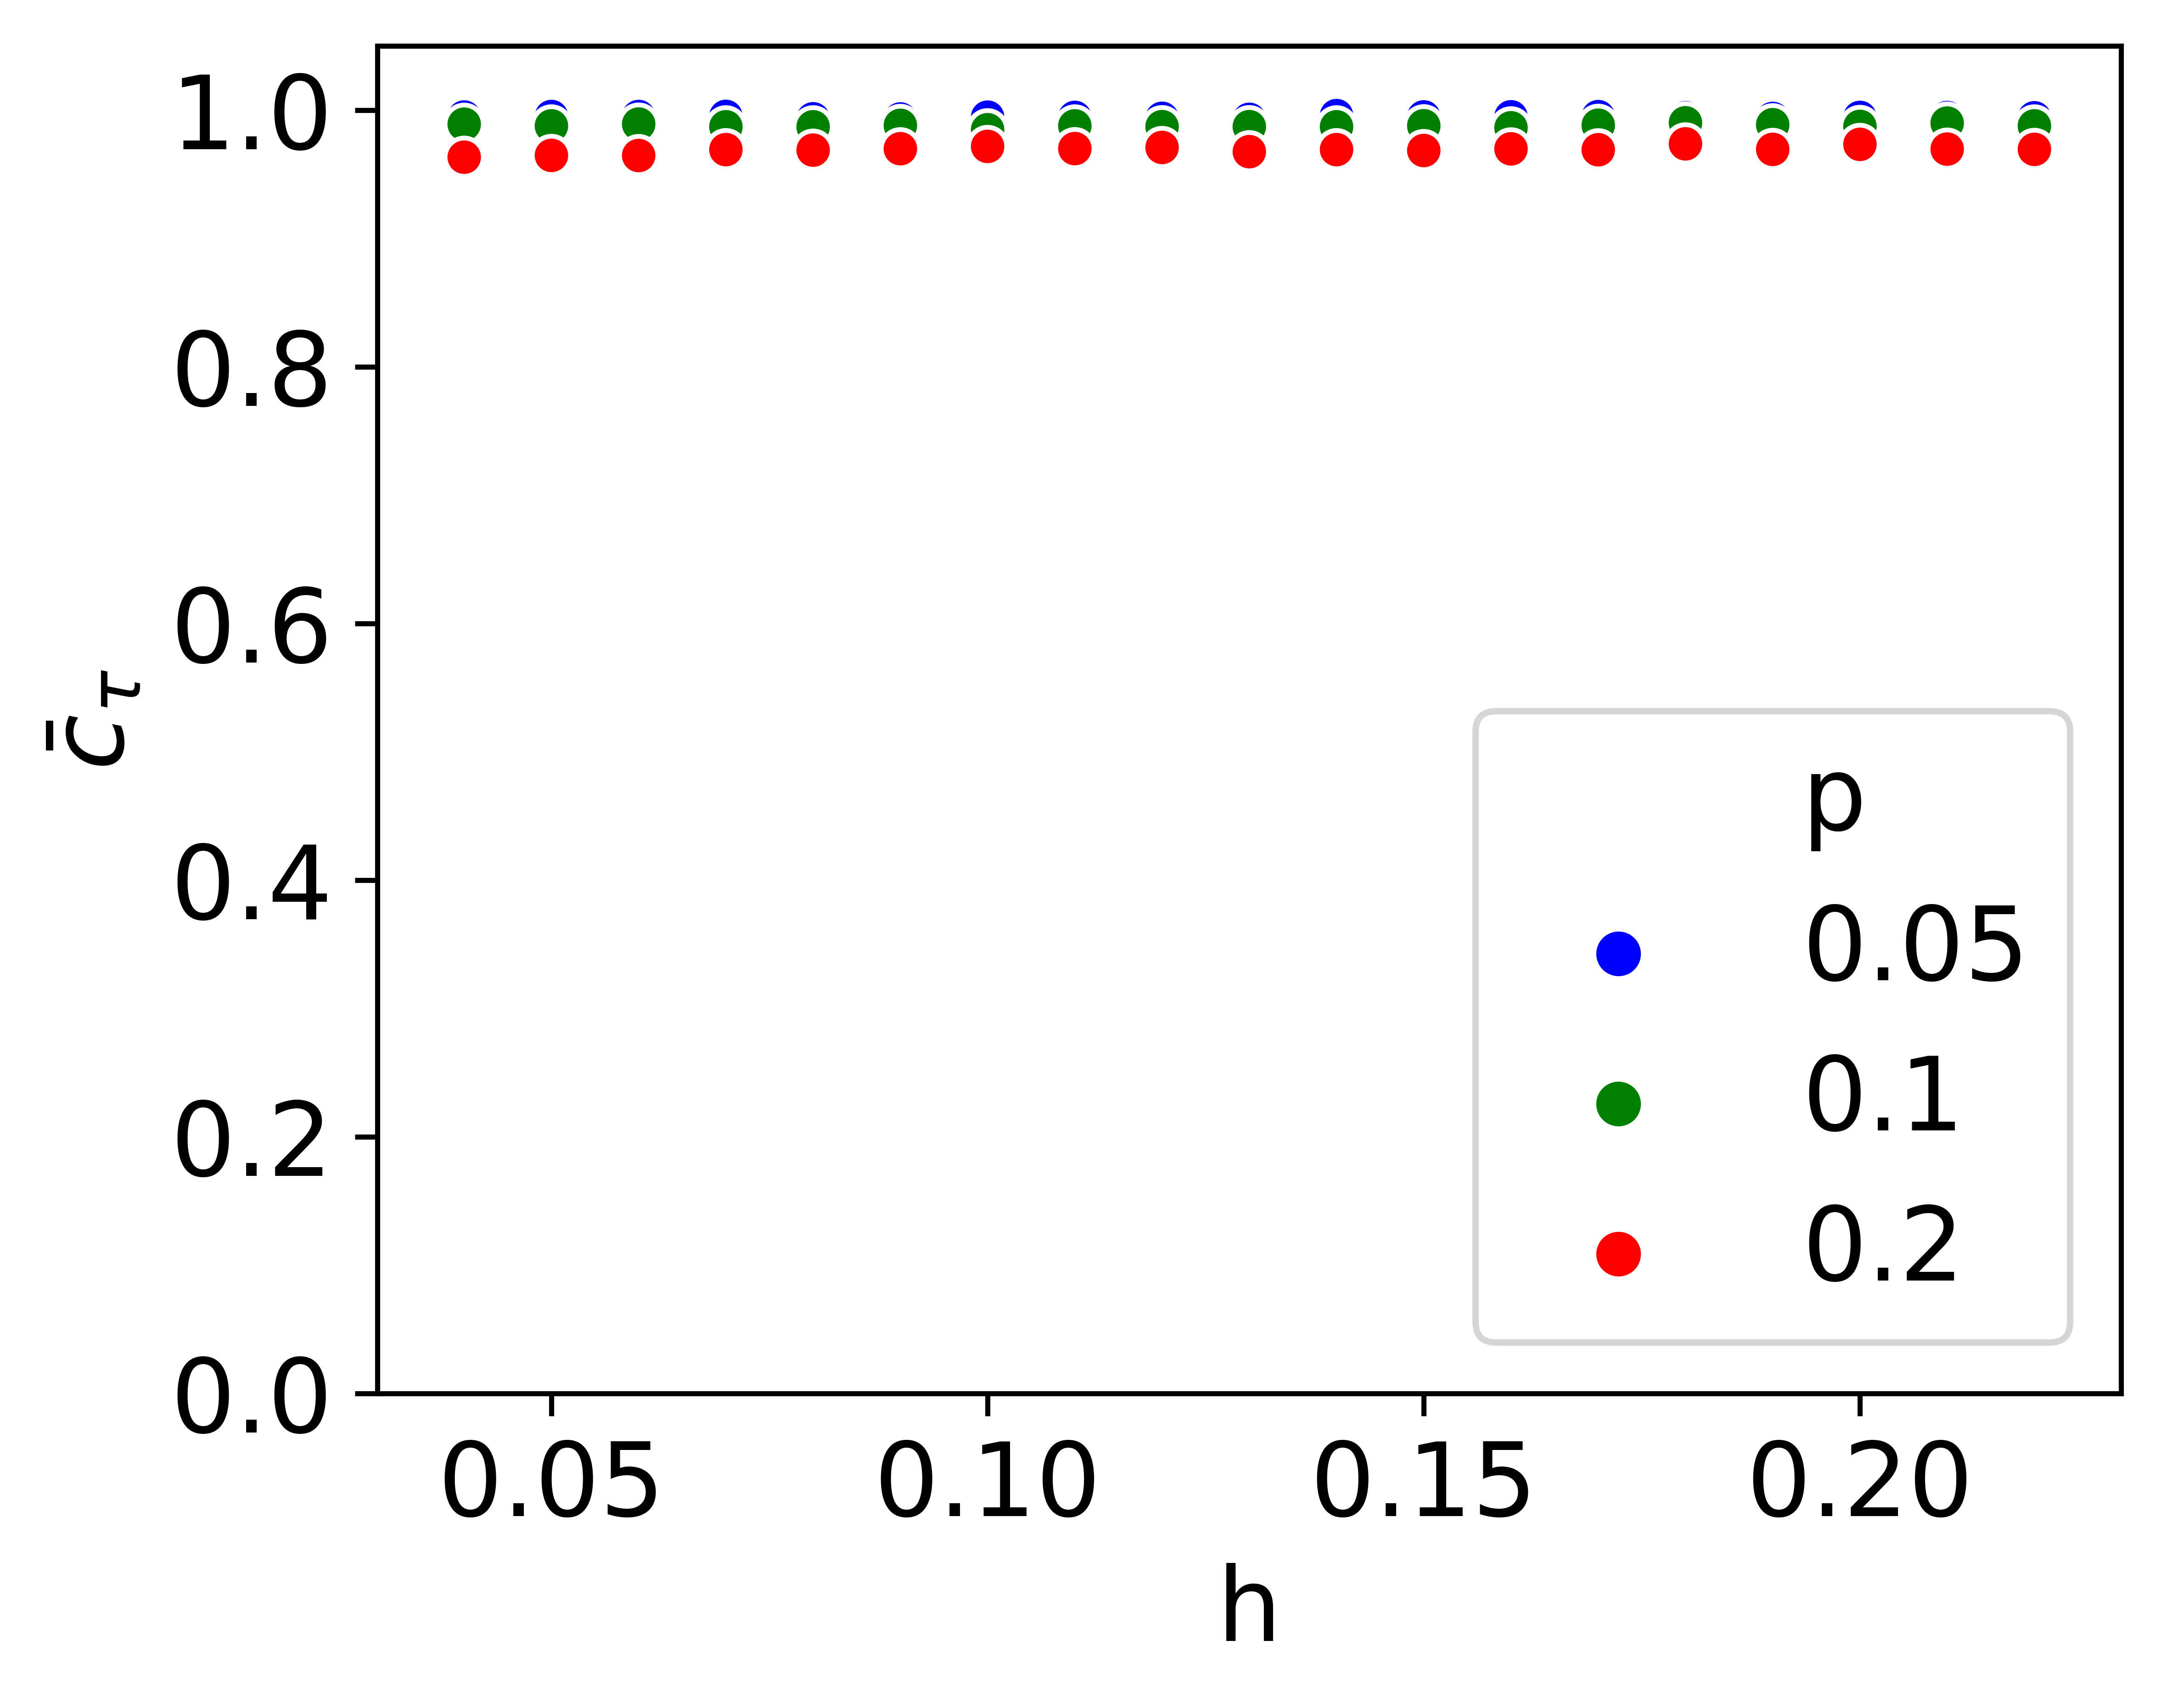

In [12]:
generate_plot(df[df['graph'] == 'barabasi-albert'])
plt.savefig('results/images/hp-barabasi-albert.png')